In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

In [3]:
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
Scaler= StandardScaler()
X_train_Scaled= Scaler.fit_transform(X_train)
X_test_Scaled = Scaler.transform(X_test)

In [7]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train_Scaled, y_train)

SVC(kernel='linear')

In [8]:
y_pred= SVM_model.predict(X_test_Scaled)

classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



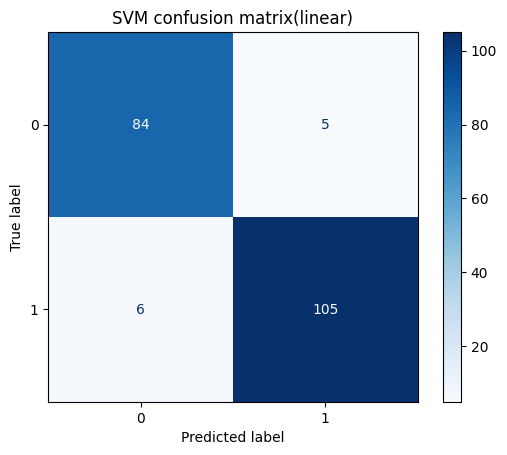

In [17]:
print ("classification_report: \n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("SVM confusion matrix(linear)")
plt.show()

KERNEL RBF 
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



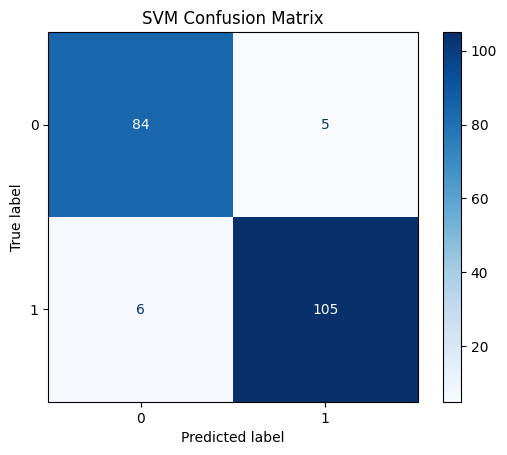

In [14]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_Scaled, y_train)

y_pred = svm_model.predict(X_test_Scaled)

print("KERNEL RBF \nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

KERNEL POLY 
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        89
           1       0.98      0.94      0.96       111

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



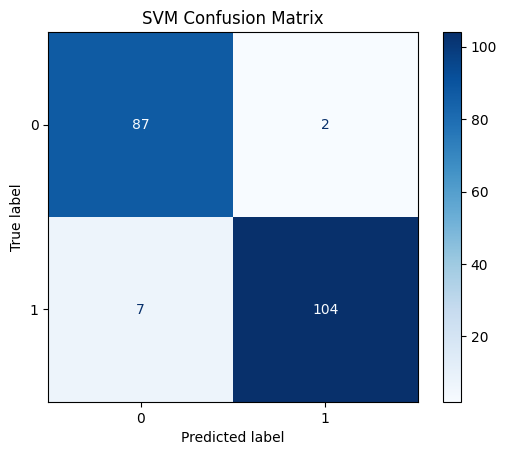

In [18]:
svm_model = SVC(kernel='poly', degree=3,probability=True, random_state=42)
svm_model.fit(X_train_Scaled, y_train)

y_pred = svm_model.predict(X_test_Scaled)

print("KERNEL POLY \nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

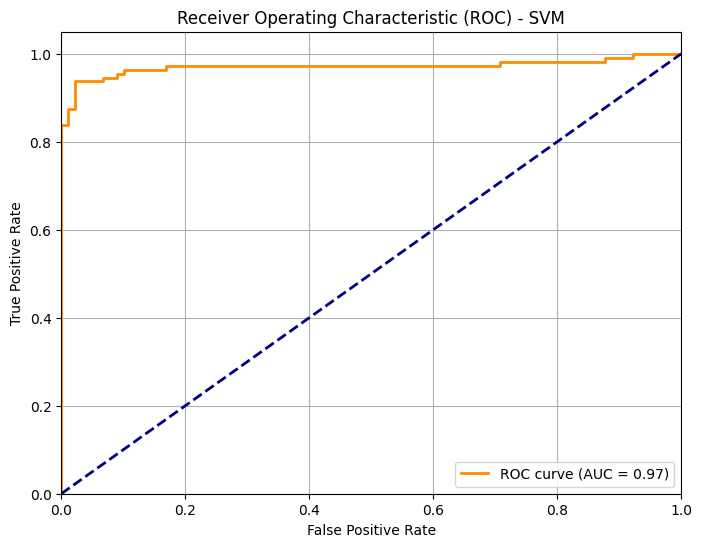

In [19]:
y_scores = svm_model.predict_proba(X_test_Scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()